In [1]:
import os
from pathlib import Path
import numpy as np

In [2]:
cwd = Path(os.getcwd())
PROJETC_ROOT = cwd.parent
DATA_PATH = PROJETC_ROOT / "data"

# basis = np.load(DATA_PATH / "basis.npz")["matrix"]

In [3]:
# RESULTS_DIR = PROJECT_ROOT / "results" / "pca" / "non-normalized"

## Dataset acquaintance

In [4]:
# num_samples = basis.shape[0]
# original_num_features = basis.shape[1]

# print(f"Number of samples: {num_samples}")
# print(f"Number of features: {original_num_features}")

In [5]:
# X_NORM = np.load(DATA_PATH / 'X_norm.npz')['X_norm']
# X = np.load(DATA_PATH / 'X.npz')['X']

## Experiments

Gathering results

In [15]:
RESULTS_DIR = PROJETC_ROOT/ "results"
TEST_DIR_TO_SKIP = "test"

In [16]:
methods = ["PCA", "PaCMAP", "tSNE", "TriMAP", "UMAP"]
methods =[m.lower() for m in methods]

architectures = ["CPU", "GPU"]
architectures = [a.lower() for a in architectures]

dataset_options = ["normalized", "non_normalized", "non-normalized"]

Parsing experiments logs

In [17]:
from utils import LogMetrics, ExperimentResult, parse_log_metrics, parse_experiments


log_metrics_data, all_experiment_results = parse_experiments(methods=methods, architectures=architectures, dataset_options=dataset_options, RESULTS_DIR=RESULTS_DIR, TEST_DIR_TO_SKIP=TEST_DIR_TO_SKIP)

Merging experiment logs to a dataframe

In [18]:
import pandas as pd


def get_experiment_dataframe(
    all_experiment_results: list[ExperimentResult],
) -> pd.DataFrame:
    if all_experiment_results:
        experiment_data_for_df = []
    for exp in all_experiment_results:
        exp_vars = vars(exp).copy()
        # print(exp_vars)

        if "metrics" in exp_vars:
            metrics_data = exp_vars.pop("metrics")
            metrics_vars = metrics_data.__dict__
            combined_vars = {**exp_vars, **metrics_vars}
        else:
            combined_vars = exp_vars
        experiment_data_for_df.append(combined_vars)

    df_experiments = pd.DataFrame(experiment_data_for_df)
    df_experiments["wall_time_s"] = pd.to_numeric(
        df_experiments["wall_time_s"], errors="coerce"
    )

    return df_experiments

In [20]:
# main dataframe
df_experiments = get_experiment_dataframe(all_experiment_results)

# support dataframe
df_metrics = pd.DataFrame([vars(metric) for metric in log_metrics_data])

Precise logs from experiments

In [32]:
df_metrics.head()

,timestamp,method_details,explained_variance_first_2,total_explained_variance_100_comps,components_for_90_variance,wall_time_s,cpu_time_user_s,cpu_time_sys_s,cpu_time_total_s,gpu_kernel_time_s,gpu_memory_used_mb,gpu_memory_total_mb,gpu_model,gpu_driver,points,original_dims,pca_dims_saved,hostname
0,2025-05-30T17:34:28.319348,PaCMAP,None,NaN,NaN,1720.77,1796.82,7.65,1804.47,NaN,NaN,NaN,None,None,NaN,NaN,NaN,ac0625
1,2025-06-08T17:29:16.170107,PaCMAP (CPU),None,NaN,NaN,1941.74,2024.34,4.77,2029.11,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0016
2,2025-06-08T15:42:32.155650,PaCMAP (CPU),None,NaN,NaN,1867.88,1961.01,4.12,1965.12,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0011
3,2025-06-08T15:39:51.778189,PaCMAP (CPU),None,NaN,NaN,1746.97,1764.68,1.49,1766.17,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0016
4,2025-06-08T17:26:16.031911,PaCMAP (CPU),None,NaN,NaN,1826.25,1840.02,2.07,1842.09,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0016


Cumulative data

In [31]:
df_experiments.head()

,method,architecture,dataset_type,precomputed_pca,original_method_arch_string,timestamp,method_details,explained_variance_first_2,total_explained_variance_100_comps,components_for_90_variance,...,cpu_time_total_s,gpu_kernel_time_s,gpu_memory_used_mb,gpu_memory_total_mb,gpu_model,gpu_driver,points,original_dims,pca_dims_saved,hostname
0,pacmap,cpu,non_normalized,False,pacmap_time.txt,2025-05-30T17:34:28.319348,PaCMAP,None,NaN,NaN,...,1804.47,NaN,NaN,NaN,None,None,NaN,NaN,NaN,ac0625
1,pacmap,cpu,non_normalized,False,pacmap_time.txt,2025-06-08T17:29:16.170107,PaCMAP (CPU),None,NaN,NaN,...,2029.11,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0016
2,pacmap,cpu,normalized,False,pacmap_time.txt,2025-06-08T15:42:32.155650,PaCMAP (CPU),None,NaN,NaN,...,1965.12,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0011
3,pacmap,cpu,normalized,True,pacmap_time.txt,2025-06-08T15:39:51.778189,PaCMAP (CPU),None,NaN,NaN,...,1766.17,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0016
4,pacmap,cpu,normalized,True,pacmap_time.txt,2025-06-08T17:26:16.031911,PaCMAP (CPU),None,NaN,NaN,...,1842.09,NaN,NaN,NaN,None,None,NaN,NaN,NaN,t0016


General outlook on the data

In [30]:
df_experiments_sorted_by_wall_time_asc = df_experiments.sort_values(by='wall_time_s', ascending=True)
df_experiments_sorted_by_wall_time_asc[['wall_time_s', 'method', 'architecture', 'dataset_type']]

,wall_time_s,method,architecture,dataset_type
13,0.87,pca,gpu,normalized
12,1.23,pca,gpu,non_normalized
9,11.13,pca,cpu,non_normalized
11,11.71,pca,cpu,normalized
10,12.68,pca,cpu,non_normalized
35,24.27,umap,gpu,non_normalized
36,24.37,umap,gpu,non_normalized
34,25.60,umap,gpu,normalized
37,26.96,umap,gpu,non_normalized
33,29.40,umap,gpu,non_normalized


Grouped by methods, dataset type (normalized vs. non-normalized), architecture (CPU vs. GPU)

In [55]:
grouped = df_experiments.groupby(['method','dataset_type', "architecture"]).agg({"wall_time_s": "mean"})
res_grouped = grouped.apply(lambda x: x.sort_values(ascending=True))
res_grouped.apply(lambda x: round(x, 2), axis=1)

wall_time_s
method dataset_type   architecture             
pca    normalized     gpu                  0.87
       non_normalized gpu                  1.23
       normalized     cpu                 11.71
       non_normalized cpu                 11.90
umap   normalized     gpu                 25.60
       non_normalized gpu                 27.14
tsne   non_normalized gpu                338.95
       normalized     cpu                855.42
       non_normalized cpu               1583.32
umap   normalized     cpu               1644.85
pacmap normalized     cpu               1813.70
       non_normalized cpu               1831.26
umap   non_normalized cpu               2096.28
pacmap normalized     gpu               2248.47
       non_normalized gpu               2294.74
trimap non_normalized cpu               2916.61
       normalized     cpu               3107.57
tsne   normalized     gpu               6319.87

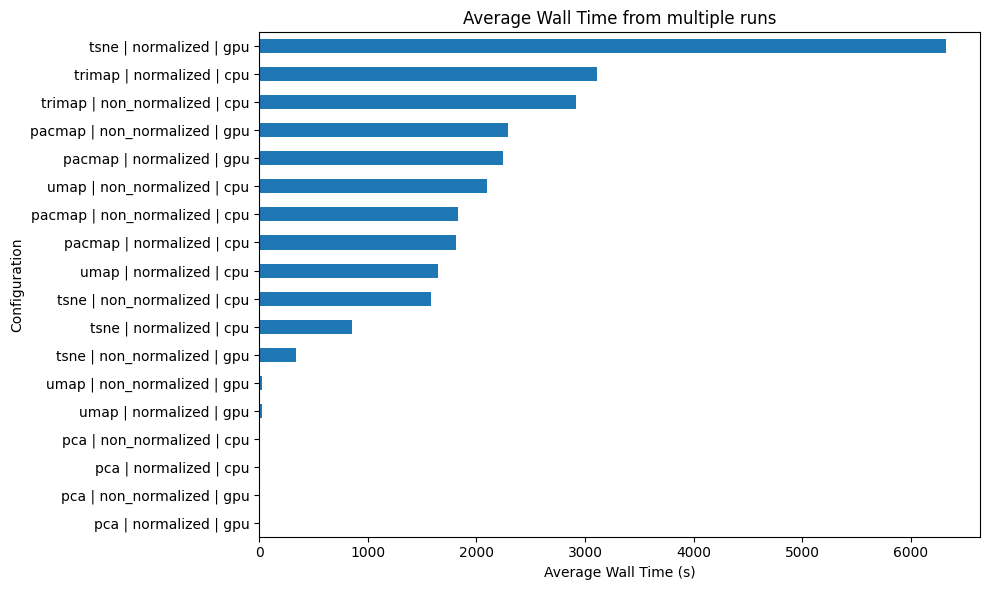

In [54]:
ax = res_grouped['wall_time_s'].plot(kind='barh', 
                            figsize=(10, 6), 
                            title='Average Wall Time from multiple runs')

new_labels = [' | '.join(map(str,idx)) for idx in res_grouped.index]
ax.set_yticklabels(new_labels)

ax.set_xlabel("Average Wall Time (s)")
ax.set_ylabel("Configuration")

import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

As can be observed, the t-SNE algorithm run on GPU produced some outlying results...

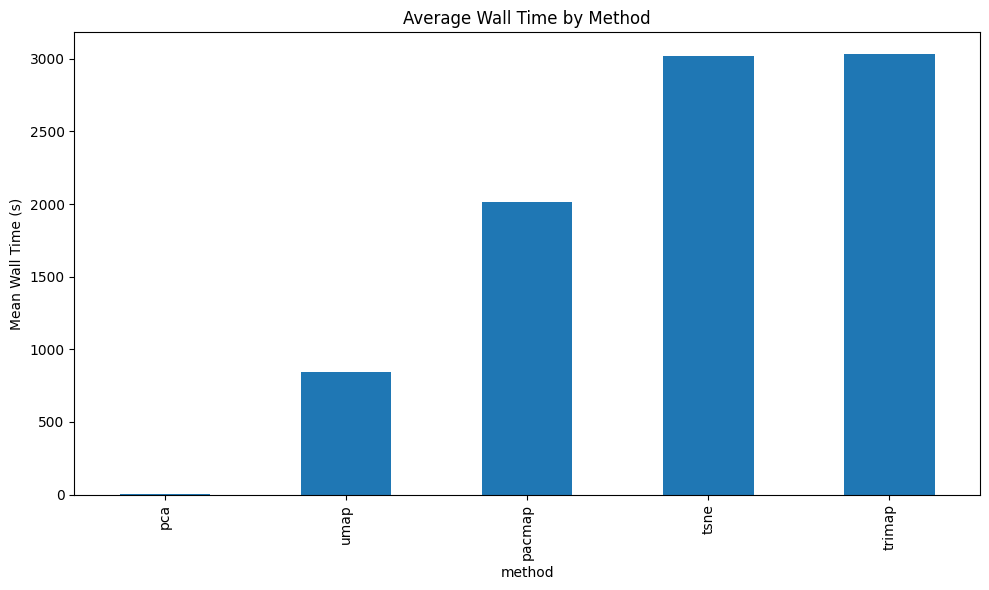

In [69]:
mean_time_by_method = df_experiments.groupby('method')['wall_time_s'].mean().sort_values()
mean_time_by_method.plot(kind='bar', title='Average Wall Time by Method', ylabel='Mean Wall Time (s)', figsize=(10,6))
plt.tight_layout()
plt.show()

## Normalized vs. non-normalized data

In [48]:
normalized_group = df_experiments[df_experiments['dataset_type'] == 'normalized']
norm_grouped = normalized_group.groupby(['method', 'architecture']).agg({'wall_time_s': ["min", "mean", "std", 'count']})
norm_grouped = norm_grouped.apply(lambda x: round(x, 2), axis=1)
norm_grouped.sort_values(by=('wall_time_s', 'min'), ascending=True)

wall_time_s                         
                            min     mean       std count
method architecture                                     
pca    gpu                 0.87     0.87       NaN   1.0
       cpu                11.71    11.71       NaN   1.0
umap   gpu                25.60    25.60       NaN   1.0
tsne   gpu                71.42  6319.87  10602.07   3.0
       cpu               816.92   855.42     54.44   2.0
umap   cpu              1464.29  1644.85    205.32   3.0
pacmap cpu              1746.97  1813.70     61.42   3.0
       gpu              2166.80  2248.47    124.65   3.0
trimap cpu              2731.92  3107.57    480.46   3.0

In [50]:
non_normalized = df_experiments[df_experiments['dataset_type'] == 'non_normalized']
grouped_non = non_normalized.groupby(['method', 'architecture']).agg({'wall_time_s': ["min", "mean", "std", 'count']})
grouped_non = grouped_non.apply(lambda x: round(x, 2), axis=1)
grouped_non.sort_values(by=('wall_time_s', 'min'), ascending=True)

wall_time_s                       
                            min     mean     std count
method architecture                                   
pca    gpu                 1.23     1.23     NaN   1.0
       cpu                11.13    11.90    1.10   2.0
umap   gpu                24.27    27.14    2.91   5.0
tsne   gpu               338.95   338.95     NaN   1.0
       cpu              1569.49  1583.32   19.55   2.0
pacmap cpu              1720.77  1831.26  156.25   2.0
umap   cpu              1893.86  2096.28  286.27   2.0
pacmap gpu              2294.74  2294.74     NaN   1.0
trimap cpu              2771.53  2916.61  205.17   2.0

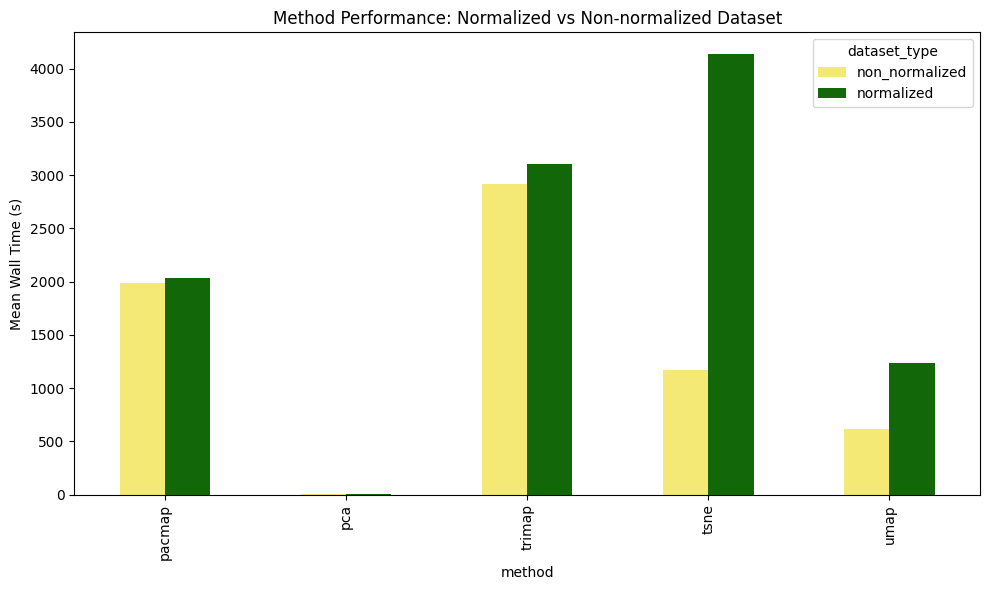

In [60]:
colors = ["#f4e975", "#126809"]
method_dataset_comparison = df_experiments.groupby(['method', 'dataset_type'])['wall_time_s'].mean().unstack()
method_dataset_comparison.plot(kind='bar', title='Method Performance: Normalized vs Non-normalized Dataset', ylabel='Mean Wall Time (s)', figsize=(10,6), color=colors)
plt.tight_layout()
plt.show()

## CPU vs. GPU

### Wall time

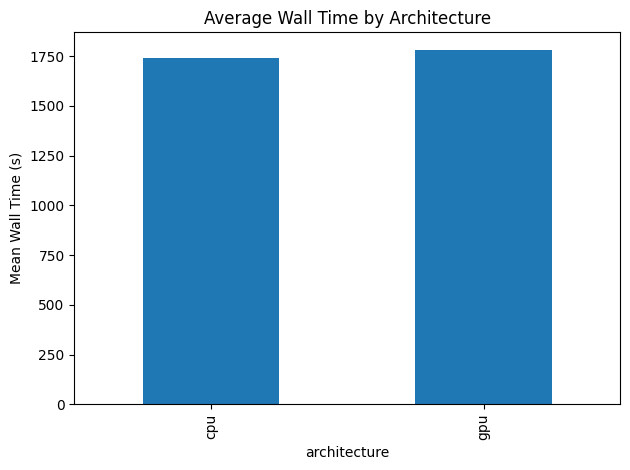

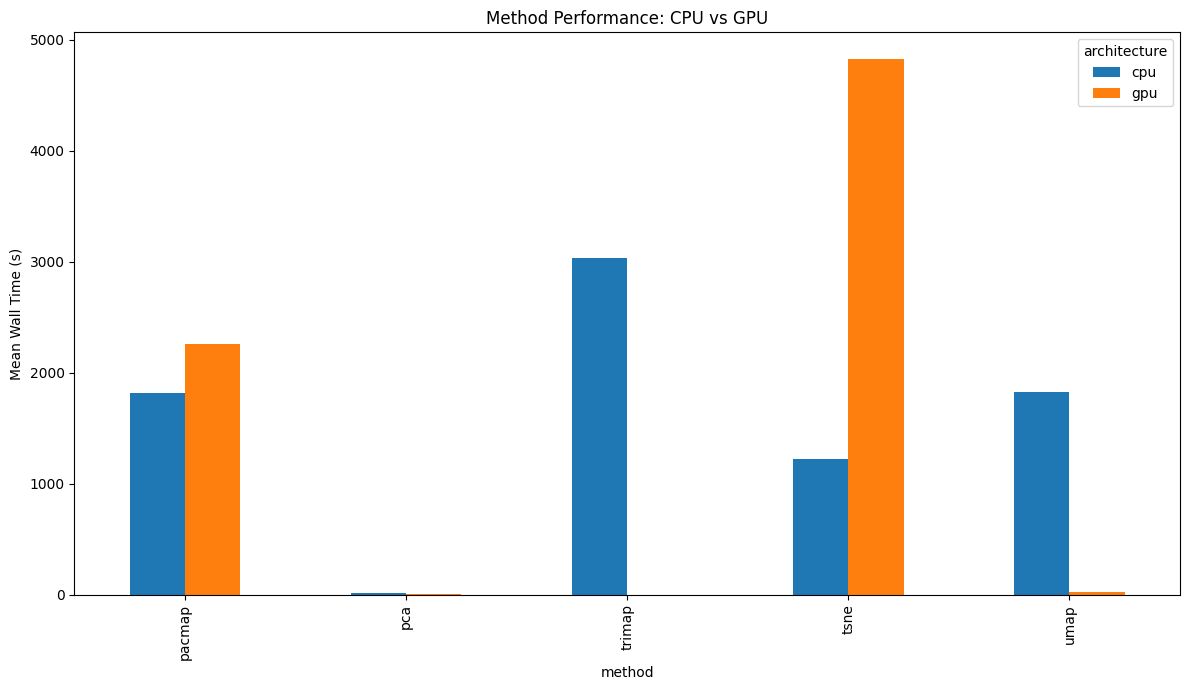

In [62]:
# Average wall time by architecture
mean_time_by_architecture = df_experiments.groupby('architecture')['wall_time_s'].mean().sort_values()
mean_time_by_architecture.plot(kind='bar', title='Average Wall Time by Architecture', ylabel='Mean Wall Time (s)')
plt.tight_layout()
plt.show()

# Average wall time by method performance on CPU vs GPU
method_arch_comparison = df_experiments.groupby(['method', 'architecture'])['wall_time_s'].mean().unstack()
method_arch_comparison.plot(kind='bar', title='Method Performance: CPU vs GPU', ylabel='Mean Wall Time (s)', figsize=(12,7))
plt.tight_layout()
plt.show()

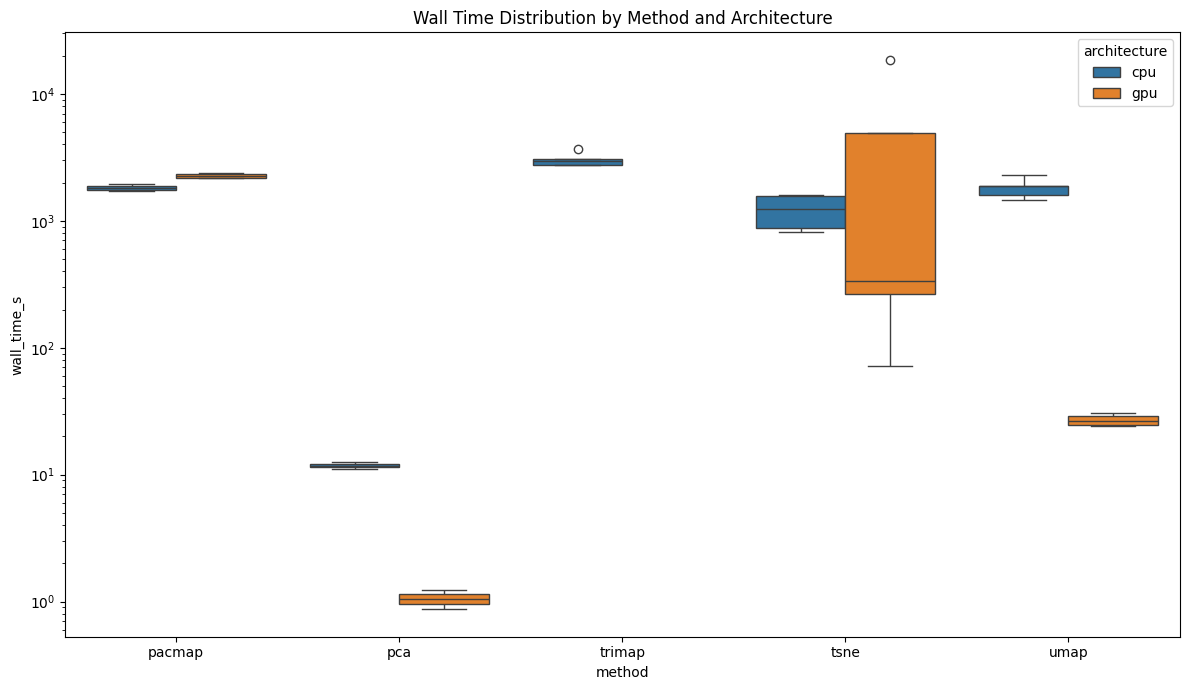

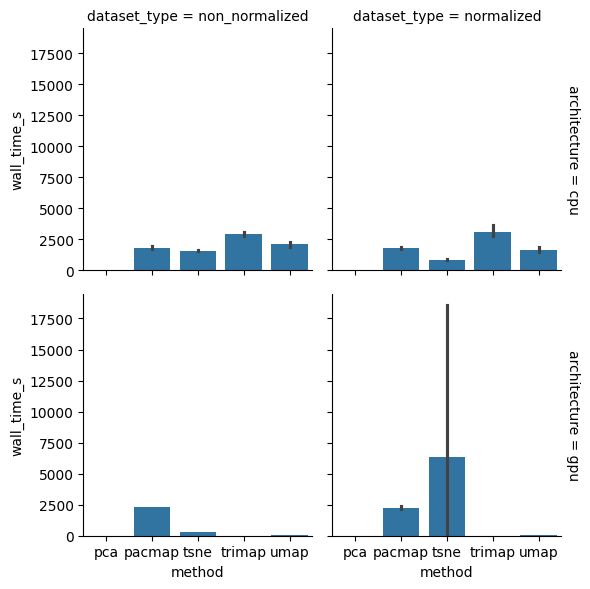

In [76]:
import seaborn as sns

# Example: Boxplot of wall_time_s by method, colored by architecture
plt.figure(figsize=(12, 7))
sns.boxplot(x='method', y='wall_time_s', hue='architecture', data=df_experiments)
plt.title('Wall Time Distribution by Method and Architecture')
plt.yscale('log') # If times vary a lot, a log scale can be helpful
plt.tight_layout()
plt.show()

# Example: FacetGrid for more complex comparisons
g = sns.FacetGrid(df_experiments, col="dataset_type", row="architecture", margin_titles=True)
g.map(sns.barplot, "method", "wall_time_s", order=methods) # Assuming 'methods' is your list of methods
plt.tight_layout()
plt.show()

### CPU time

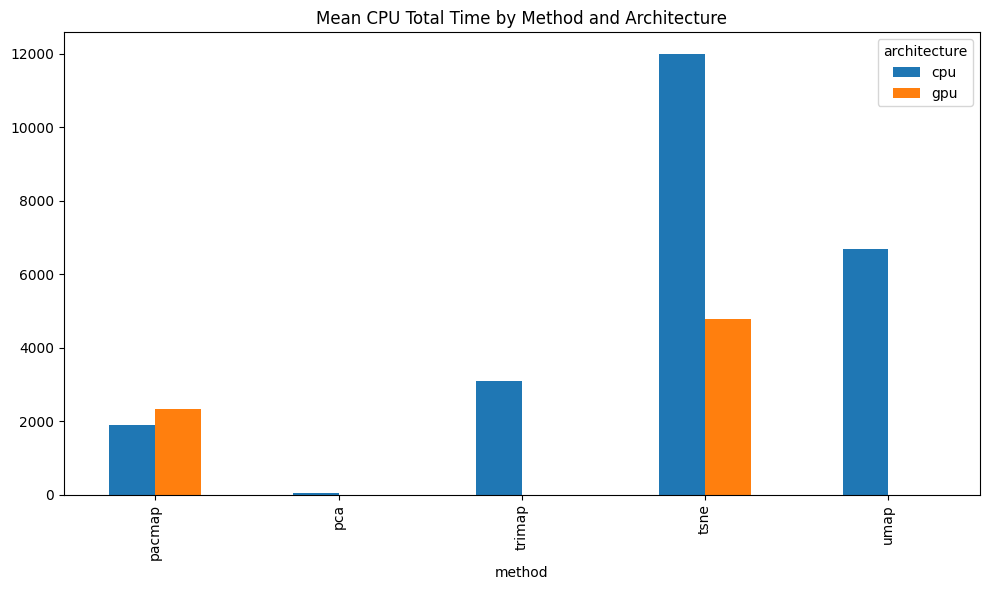

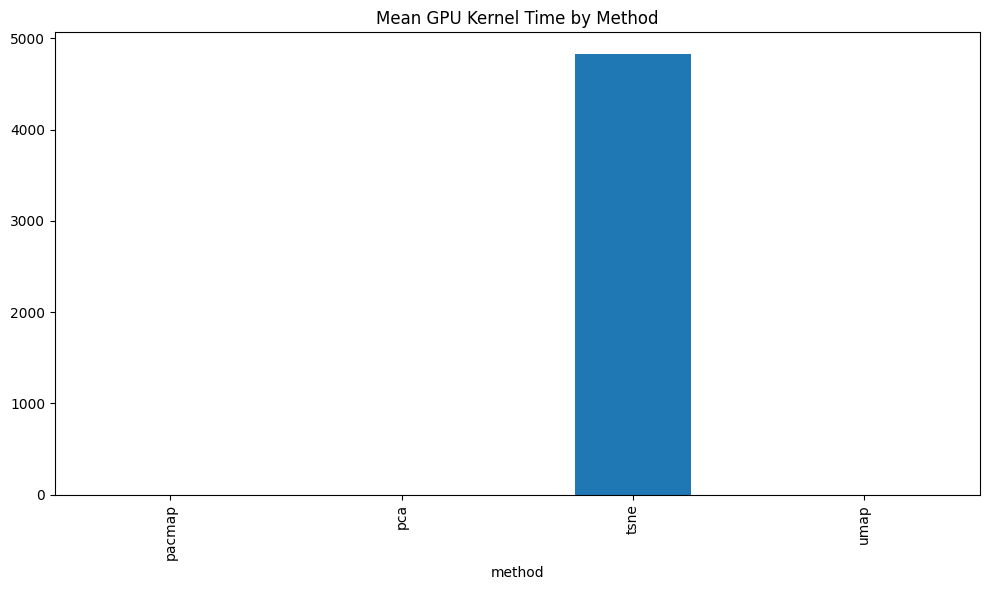

In [64]:
cpu_time_analysis = df_experiments.groupby(['method', 'architecture'])['cpu_time_total_s'].mean().unstack()
cpu_time_analysis.plot(kind='bar', title='Mean CPU Total Time by Method and Architecture', figsize=(10,6))
plt.tight_layout()
plt.show()

gpu_kernel_time_analysis = df_experiments[df_experiments['architecture'] == 'gpu'].groupby(['method'])['gpu_kernel_time_s'].mean()
if not gpu_kernel_time_analysis.empty:
    gpu_kernel_time_analysis.plot(kind='bar', title='Mean GPU Kernel Time by Method', figsize=(10,6))
    plt.tight_layout()
    plt.show()

### GPU memory


Mean GPU Memory Used (MB) by Method (for GPU runs):
method
pacmap         NaN
pca        654.300
tsne      2590.525
umap           NaN
Name: gpu_memory_used_mb, dtype: float64


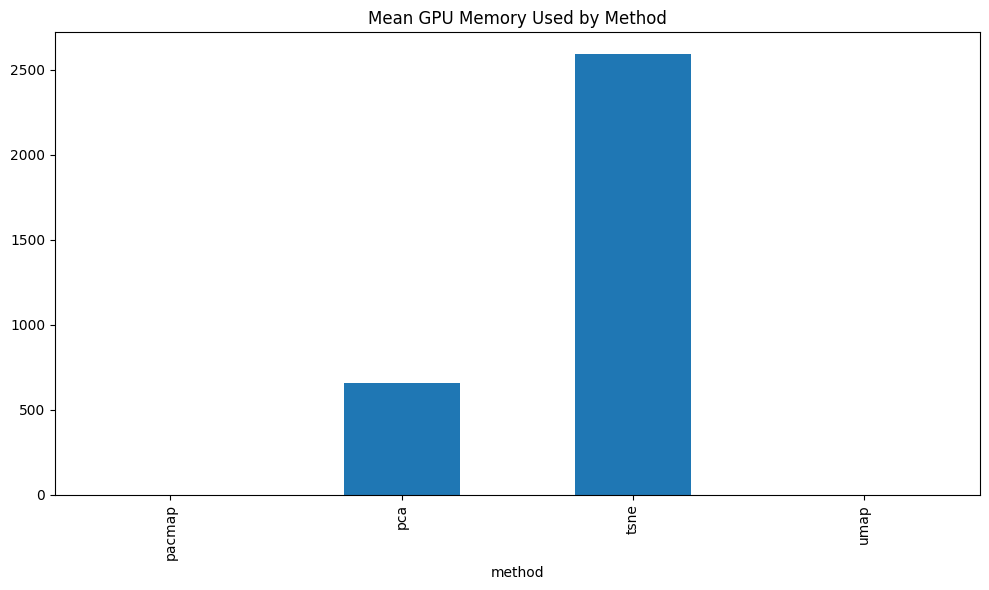

In [65]:
if 'gpu_memory_used_mb' in df_experiments.columns:
    gpu_memory_analysis = df_experiments[df_experiments['architecture'] == 'gpu'].groupby(['method'])['gpu_memory_used_mb'].mean()
    print("\nMean GPU Memory Used (MB) by Method (for GPU runs):")
    print(gpu_memory_analysis)
    if not gpu_memory_analysis.empty:
        gpu_memory_analysis.plot(kind='bar', title='Mean GPU Memory Used by Method', figsize=(10,6))
        plt.tight_layout()
        plt.show()

### Mean CPU / Mean Wall time ratio


Mean CPU Time to Wall Time Ratio by Method and Architecture:
architecture       cpu       gpu
method                          
pacmap        1.033072  1.035551
pca           3.635760  0.774741
trimap        1.015417       NaN
tsne          9.534573  0.993681
umap          3.680945       NaN


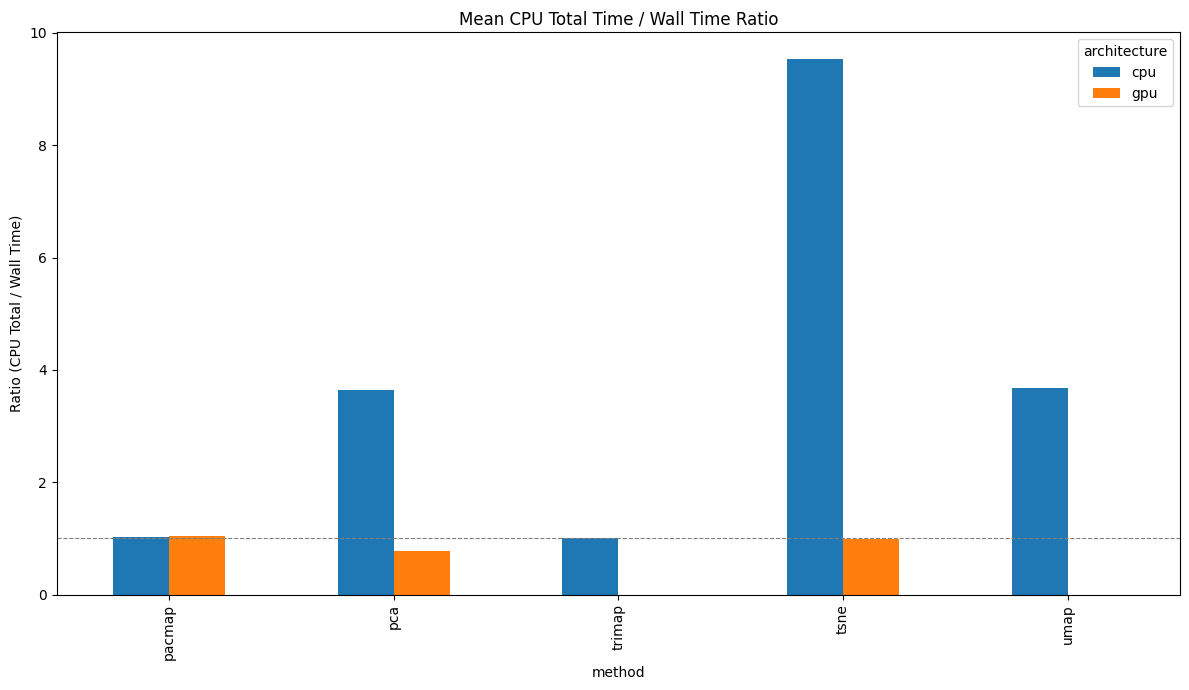

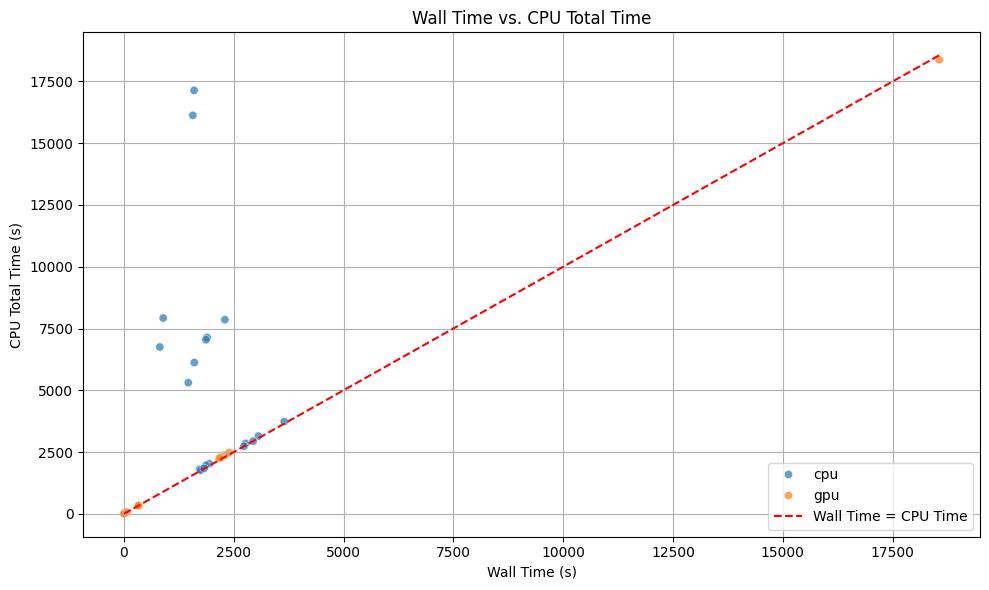

In [104]:

if 'wall_time_s' in df_experiments.columns and \
    'cpu_time_total_s' in df_experiments.columns and \
    df_experiments['wall_time_s'].notna().any() and \
    df_experiments['cpu_time_total_s'].notna().any():

    df_experiments_copy = df_experiments.copy()
    df_experiments_copy['cpu_to_wall_ratio'] = df_experiments_copy['cpu_time_total_s'] / df_experiments_copy['wall_time_s']
    
    print("\nMean CPU Time to Wall Time Ratio by Method and Architecture:")
    ratio_analysis = df_experiments_copy[df_experiments_copy['cpu_to_wall_ratio'].notna() & 
                                            np.isfinite(df_experiments_copy['cpu_to_wall_ratio'])]
    
    if not ratio_analysis.empty:
        mean_ratio = ratio_analysis.groupby(['method', 'architecture'])['cpu_to_wall_ratio'].mean().unstack()
        print(mean_ratio)
        
        if not mean_ratio.empty:
            mean_ratio.plot(kind='bar', figsize=(12,7), title='Mean CPU Total Time / Wall Time Ratio')
            plt.ylabel("Ratio (CPU Total / Wall Time)")
            plt.axhline(1, color='grey', linestyle='--', linewidth=0.8)
            plt.tight_layout()
            plt.show()
    else:
        print("Not enough valid data to compute CPU to Wall Time ratio analysis.")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_experiments_copy, x='wall_time_s', y='cpu_time_total_s', hue='architecture', alpha=0.7)
    max_val = max(df_experiments_copy['wall_time_s'].max(), df_experiments_copy['cpu_time_total_s'].max())
    if pd.notna(max_val):
            plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Wall Time = CPU Time')
    plt.title('Wall Time vs. CPU Total Time')
    plt.xlabel('Wall Time (s)')
    plt.ylabel('CPU Total Time (s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("\n'wall_time_s' or 'cpu_time_total_s' column not found or contains all NaNs. Cannot perform CPU vs Wall time analysis.")


## Passing embeddings precomputed with PCA to t-SNE, TriMAP, PaCMAP, UMAP

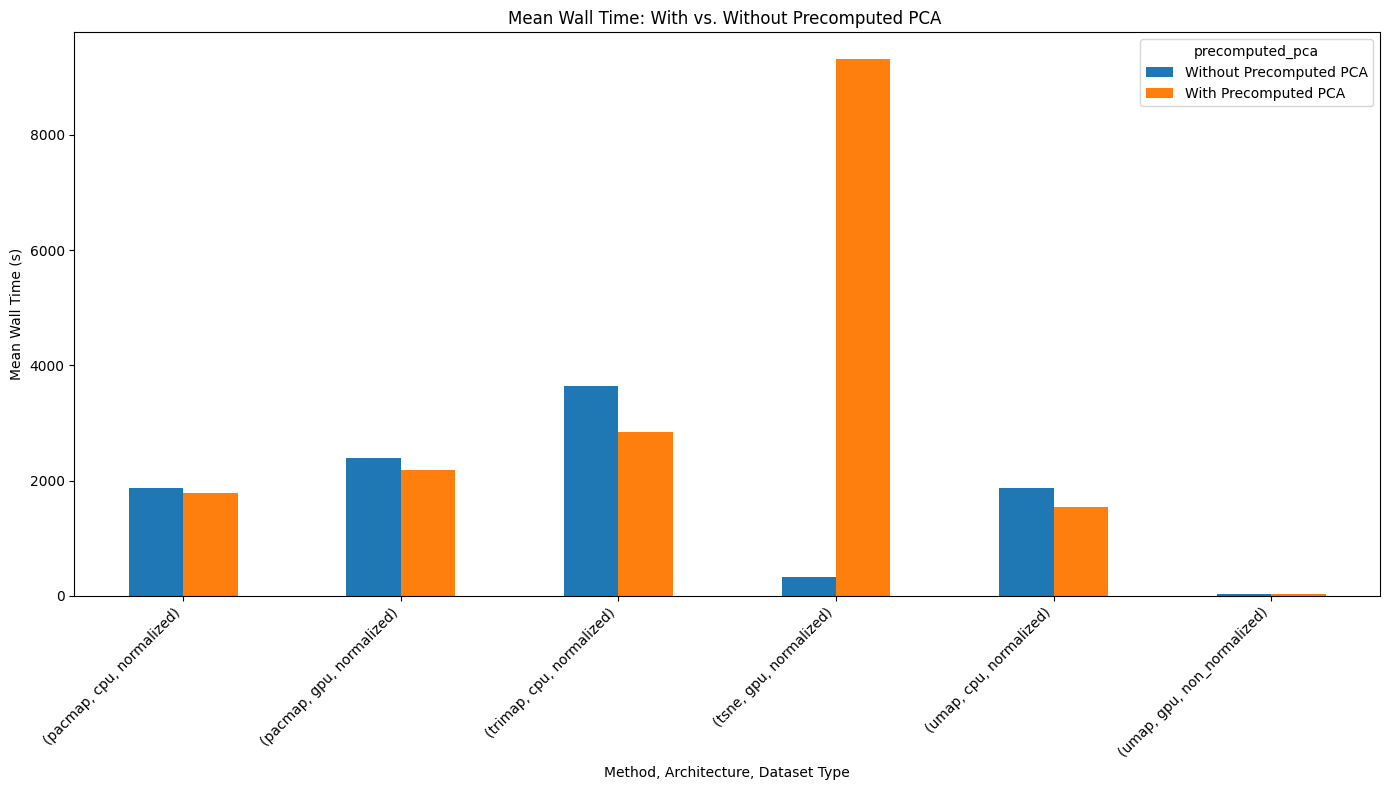

In [89]:
non_pca_methods = df_experiments[df_experiments['method'] != 'pca'].copy()

if non_pca_methods['precomputed_pca'].nunique() > 1:
    pca_impact_analysis = non_pca_methods.groupby(
        ['method', 'architecture', 'dataset_type', 'precomputed_pca']
    )['wall_time_s'].mean().unstack(level='precomputed_pca')

    # Rename columns for clarity if they are True/False
    if True in pca_impact_analysis.columns:
        pca_impact_analysis.rename(columns={True: 'With Precomputed PCA'}, inplace=True)
    if False in pca_impact_analysis.columns:
        pca_impact_analysis.rename(columns={False: 'Without Precomputed PCA'}, inplace=True)

    comparison = pca_impact_analysis.dropna(subset=['With Precomputed PCA', 'Without Precomputed PCA'])
    
    comparison_precomputed = comparison.copy()
    comparison_precomputed['time_saved_s'] = comparison_precomputed['Without Precomputed PCA'] - comparison_precomputed['With Precomputed PCA']
    comparison_precomputed['percentage_change'] = ((comparison_precomputed['With Precomputed PCA'] - comparison_precomputed['Without Precomputed PCA']) / comparison_precomputed['Without Precomputed PCA']) * 100

    plot_df = comparison_precomputed[['Without Precomputed PCA', 'With Precomputed PCA']]
    plot_df.plot(kind='bar', figsize=(14, 8),
                    title='Mean Wall Time: With vs. Without Precomputed PCA ')
    plt.ylabel("Mean Wall Time (s)")
    plt.xlabel("Method, Architecture, Dataset Type")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [85]:
comparison_precomputed.apply(lambda x: round(x, 2), axis=1)

precomputed_pca                     Without Precomputed PCA  \
method architecture dataset_type                              
pacmap cpu          normalized                      1867.88   
       gpu          normalized                      2391.95   
trimap cpu          normalized                      3648.95   
tsne   gpu          normalized                       326.99   
umap   cpu          normalized                      1868.19   
       gpu          non_normalized                    29.03   

precomputed_pca                     With Precomputed PCA  time_saved_s  \
method architecture dataset_type                                         
pacmap cpu          normalized                   1786.61         81.27   
       gpu          normalized                   2176.74        215.21   
trimap cpu          normalized                   2836.88        812.07   
tsne   gpu          normalized                   9316.30      -8989.31   
umap   cpu          normalized                   1533.18        335.02   
       gpu          non_normalized                 24.32          4.71   

precomputed_pca                     percentage_change  
method architecture dataset_type                       
pacmap cpu          normalized                  -4.35  
       gpu          normalized                  -9.00  
trimap cpu          normalized                 -22.26  
tsne   gpu          normalized                2749.11  
umap   cpu          normalized                 -17.93  
       gpu          non_normalized             -16.21

# Best results


Top 10 Best Configurations (Method | Dataset Type | Architecture) by Mean Wall Time (s):
method  dataset_type    architecture
pca     normalized      gpu               0.870
        non_normalized  gpu               1.230
        normalized      cpu              11.710
        non_normalized  cpu              11.905
umap    normalized      gpu              25.600
        non_normalized  gpu              27.144
tsne    non_normalized  gpu             338.950
Name: wall_time_s, dtype: float64


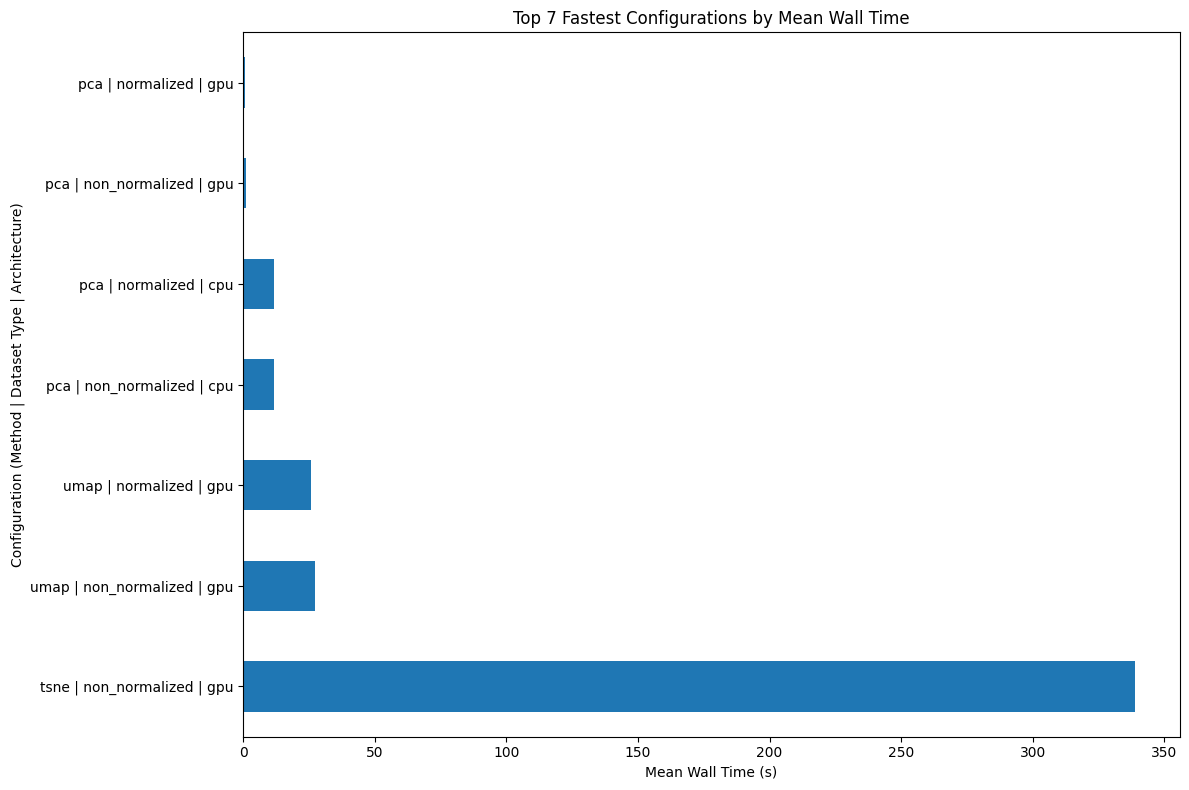

In [93]:
df_experiments['wall_time_s'] = pd.to_numeric(df_experiments['wall_time_s'], errors='coerce')
df_cleaned = df_experiments.dropna(subset=['wall_time_s', 'method', 'dataset_type', 'architecture'])
grouped_configs = df_cleaned.groupby(['method', 'dataset_type', 'architecture'])['wall_time_s'].mean()
best_configs = grouped_configs.sort_values(ascending=True)

N_TOP = 7

print("\nTop 10 Best Configurations (Method | Dataset Type | Architecture) by Mean Wall Time (s):")
print(round(best_configs.head(N_TOP), 3))

ax = best_configs.head(N_TOP).plot(kind='barh', 
                        figsize=(12, 8), 
                        title=f'Top {N_TOP} Fastest Configurations by Mean Wall Time')

if isinstance(best_configs.head(N_TOP).index, pd.MultiIndex):
    new_labels = [' | '.join(map(str,idx)) for idx in best_configs.head(N_TOP).index]
    ax.set_yticklabels(new_labels)

ax.set_xlabel("Mean Wall Time (s)")
ax.set_ylabel("Configuration (Method | Dataset Type | Architecture)")
plt.gca().invert_yaxis() # To show the best (fastest) at the top
plt.tight_layout()
plt.show()


## 1. PCA non-normalized CPU

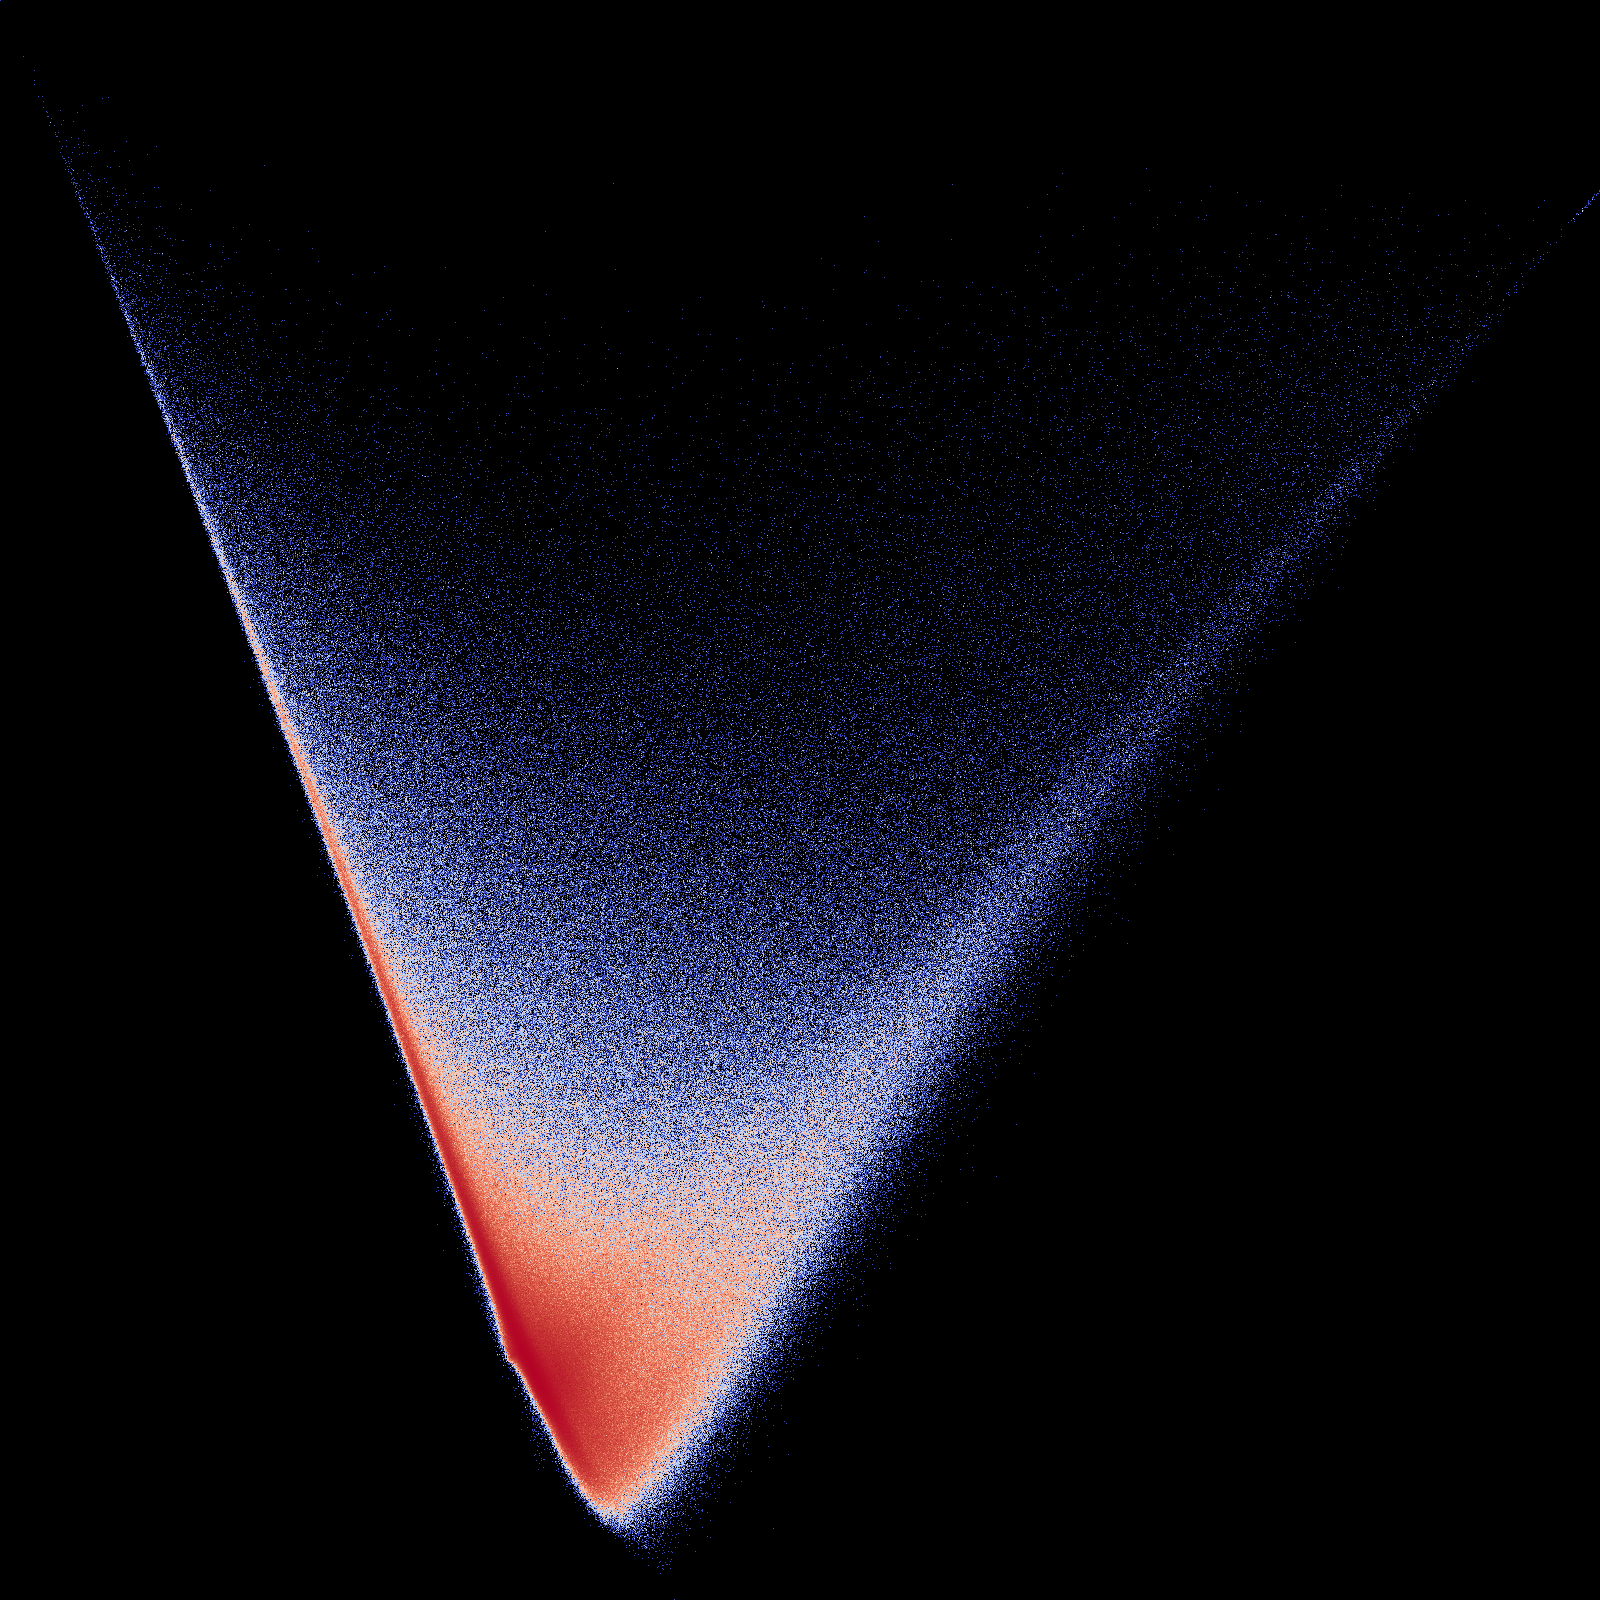

In [ ]:
from IPython.display import Image, display


display(Image(filename=RESULTS_DIR / "pca\pca_datashader_coolwarm_eqhist_black_blurred.png", width=400))

## Structural analysis

In [126]:
df_pca = df_experiments[df_experiments['method'] == 'pca'].groupby(
    ['architecture', 'dataset_type']
).agg({
    'wall_time_s': 'mean',
    'components_for_90_variance': 'mean'
}).reset_index()
print("\nPCA Specific Analysis:")
if 'components_for_90_variance' in df_pca.columns:
    print(df_pca[['architecture', 'dataset_type', 'wall_time_s', 'components_for_90_variance']].sort_values(by='wall_time_s'))


PCA Specific Analysis:
  architecture    dataset_type  wall_time_s  components_for_90_variance
3          gpu      normalized        0.870                        61.0
2          gpu  non_normalized        1.230                        10.0
1          cpu      normalized       11.710                        61.0
0          cpu  non_normalized       11.905                        10.0


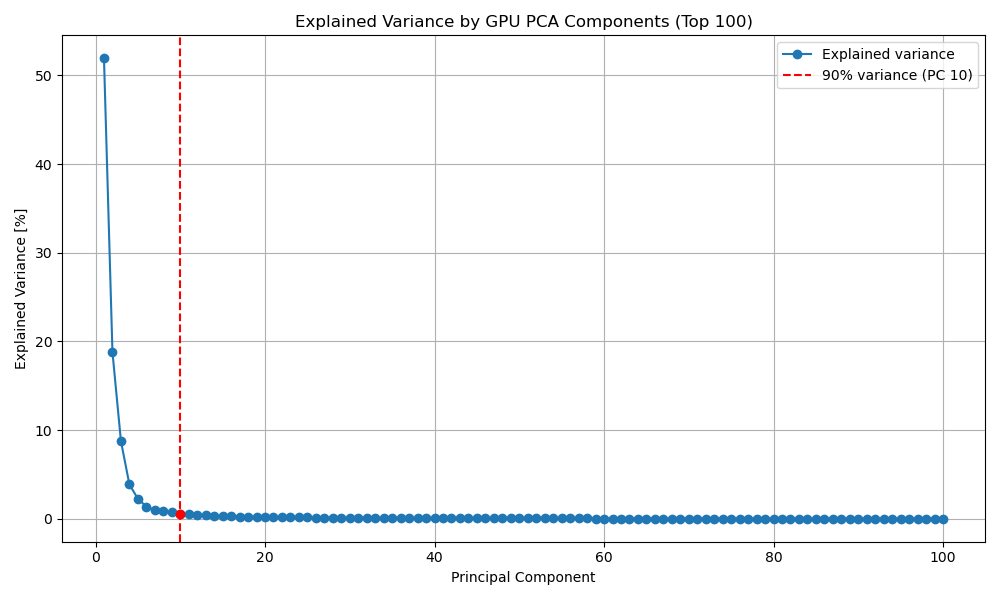

In [111]:
display(Image(filename=RESULTS_DIR / "pca_gpu\\non-normalized\explained_variance.png"))

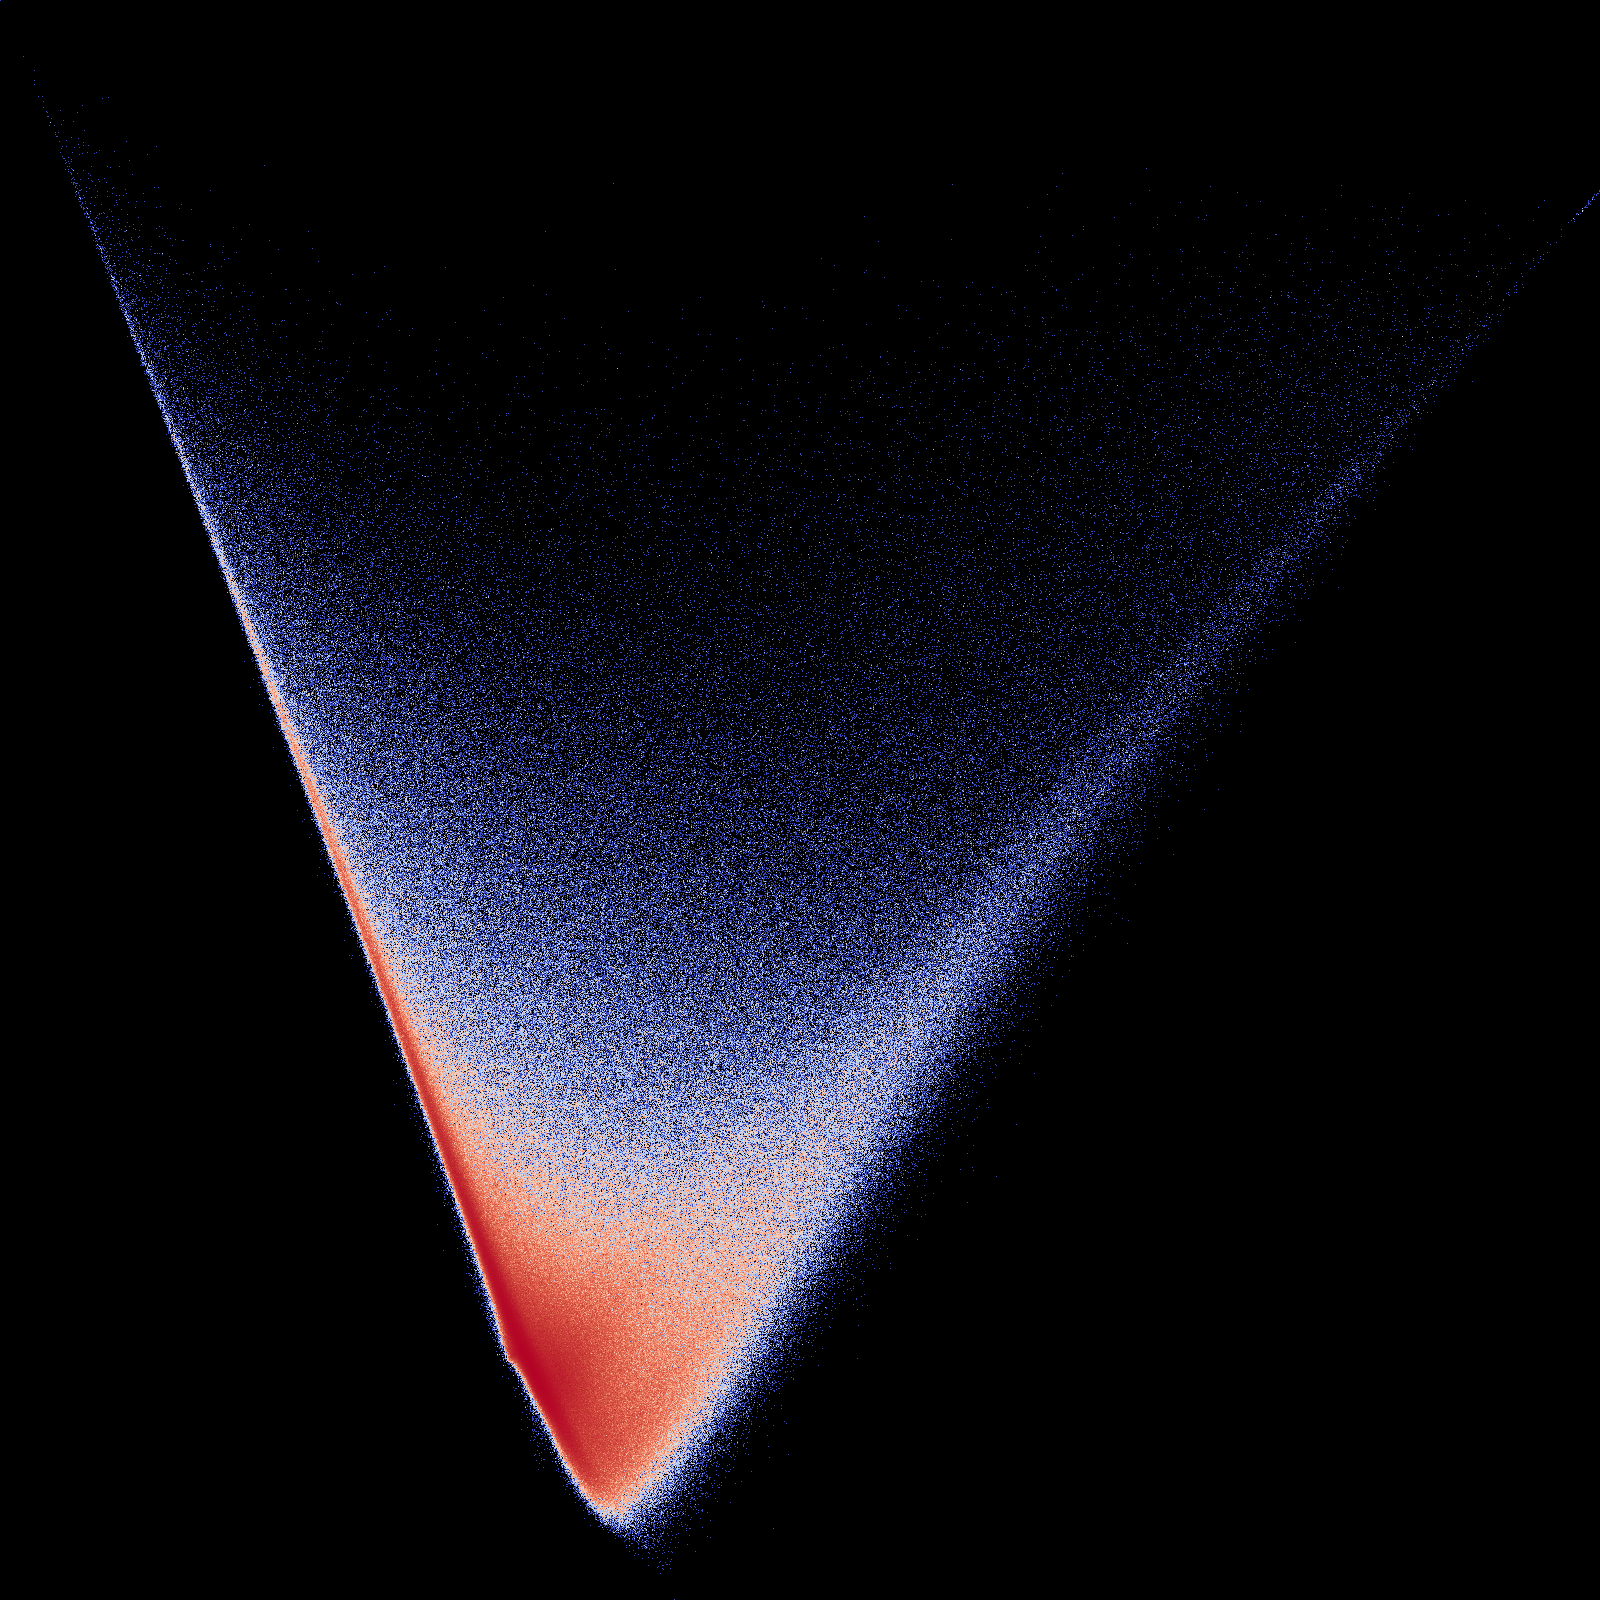

In [120]:
display(Image(filename=RESULTS_DIR / "pca\pca_datashader_coolwarm_eqhist_black_blurred.png", width=400))

## 2. UMAP normalized GPU

In [ ]:
display(Image(filename=RESULTS_DIR / "pca\pca_datashader_coolwarm_eqhist_black_blurred.png", width=400))